In [4]:
#Układy regulacji automatycznej

%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)
poles_figsize  =( 6, 6)

---- 
## Układ sterowany i regulatory
---- 
Transmitancja układu:
$$ H_0(s) = {{1} \over {s^2 + 10s + 20}} $$
Regulatory:  
* regulator proporcjonalny P (P1): $ k_p=300 $  
* regulator proporcjonalny P (P2): $ k_p=600 $  
* regulator proporcjonalno całkujący PI: $ k_p=30, k_i=70 $  
* regulator proporcjonalno różniczkujący PD: $ k_p=300, k_d=10 $  
* regulator proporcjonalno całkująco różniczkujący PID: $ k_p=300, k_i=300, k_d=50 $  

In [5]:
#declare symbolic variable 's' and 't'
s  = sympy.symbols('s', cpmplex = True)
t  = sympy.symbols('t', real    = True, positive = True)

#declare system transmitance
H0 = 1 /(s**2 + 10*s + 20)

#declare regulators (use dict() and list() types)

Regulators = { "P1"  : [300,   0,  0],
               "P2"  : [600,   0,  0],
               "PI"  : [ 30,  70,  0],
               "PD"  : [300,   0, 10],
               "PID" : [300, 300, 50]
               }


for Name, Regulator in Regulators.items():
    print()
    print("regulator " + Name + " " + str(Regulator))
    print()
    kp, ki, kd = Regulator
    #determine Hr
    Hr = kp + ki/s + kd*s

    #determine H
    H = (Hr*H0) / ((Hr*H0)+1)

    #determine He
    He = (1 / ((Hr*H0) + 1))

    #determine e
    e = sympy.limit(He, s, 0)

    #display Hr, H, He and e
    display(Hr)
    print()
    display(H.cancel())
    print()
    display(He.cancel())
    print()
    display(e)
    print()


regulator P1 [300, 0, 0]



300

300/(s**2 + 10*s + 320)

(s**2 + 10*s + 20)/(s**2 + 10*s + 320)

1/16



regulator P2 [600, 0, 0]



600

600/(s**2 + 10*s + 620)

(s**2 + 10*s + 20)/(s**2 + 10*s + 620)

1/31



regulator PI [30, 70, 0]



30 + 70/s

(30*s + 70)/(s**3 + 10*s**2 + 50*s + 70)

(s**3 + 10*s**2 + 20*s)/(s**3 + 10*s**2 + 50*s + 70)

0



regulator PD [300, 0, 10]



10*s + 300

(10*s + 300)/(s**2 + 20*s + 320)

(s**2 + 10*s + 20)/(s**2 + 20*s + 320)

1/16



regulator PID [300, 300, 50]



50*s + 300 + 300/s

(50*s**2 + 300*s + 300)/(s**3 + 60*s**2 + 320*s + 300)

(s**3 + 10*s**2 + 20*s)/(s**3 + 60*s**2 + 320*s + 300)

0

In [6]:
#Dla podanego układu  H0(s)  i regulatorów wyznacz odpowiedź skokową układu

def calculateStepResponseFromNumDen(B, A, TimeDomain):
    step = scipy.signal.step(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

def calculateStepResponseFromSympyH(H, TimeDomain):
    B,A = sympy.fraction(H.simplify())
    B = [float(i) for i in sympy.Poly(B, s).all_coeffs()]
    A = [float(i) for i in sympy.Poly(A, s).all_coeffs()]
    step = calculateStepResponseFromNumDen(B, A, TimeDomain)
    return step

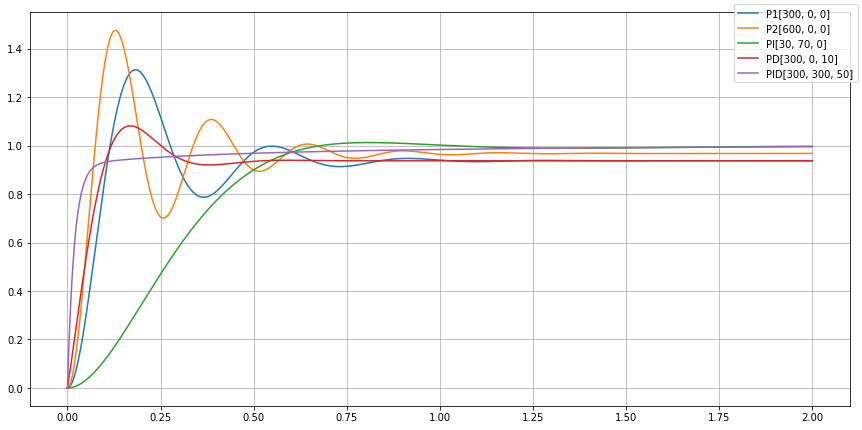

In [7]:
Regulators = { "P1"  : [300,   0,  0],
               "P2"  : [600,   0,  0],
               "PI"  : [ 30,  70,  0],
               "PD"  : [300,   0, 10],
               "PID" : [300, 300, 50]
               }

fig, ax = plt.subplots(1, 1, figsize=default_figsize)
time = np.linspace(0, 2, 2000)

for Name, Regulator in Regulators.items():  
    kp, ki, kd = Regulator

    #determine Hr
    Hr = kp + ki/s + kd*s
    #determine H
    H = (Hr*H0) / ((Hr*H0)+1)
    #calculate step response
    step = calculateStepResponseFromSympyH(H, time)
    #add step response to plot, add label
    ax.plot(time, step, label = Name+str(Regulator))
    
#make prety plot
ax.grid()
fig.legend()
fig.tight_layout()
fig.show()   

In [ ]:
#jak wzmocnienie członu całkującego wpływa na transmitancję układu



---- 
## Sprawdź, jak wzmocnienie członu całkującego wpływa na transmitancję układu
---- 
### Wyznacz odpowiedź skokową, błąd regulacji i błąd statyczny dla obiektu o transmitancji:
$$ H_0(s) = {{1} \over {0.5 s^2 + 6s + 10}} $$  


przy zastosowaniu regulatora PID: $kp=100; ki=1; kd=1$  
oceń działanie regulatora
### Następnie zmień $ki$ na $ki=200$
oceń działanie regulatora
### Spróbuj dobrać taką wartość $kd$ aby zredukować przeregulowanie i skrócić czas ustalania się odpowiedzi układu


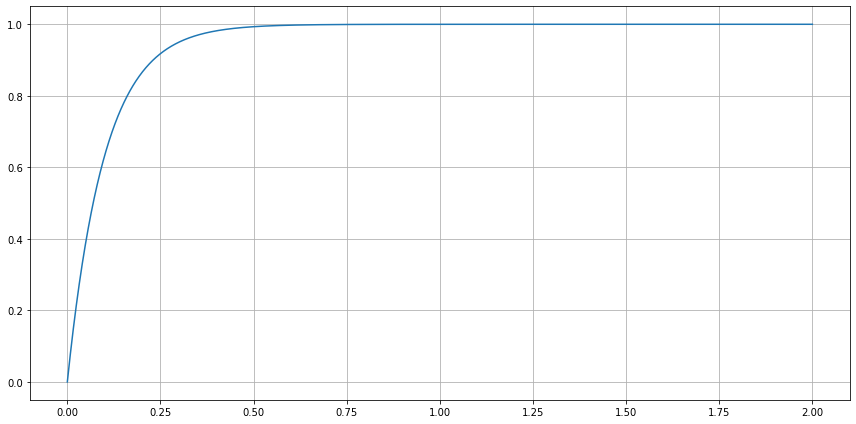

In [8]:
H1 = 1 /(0.5*s**2 + 6*s + 10)
kp = 100
ki = 200
kd = 10
#determine Hr
Hr = kp + ki/s + kd*s
#determine H
H = (Hr*H0) / ((Hr*H0)+1)
#calculate and plot step response
fig, ax = plt.subplots(1, 1, figsize=default_figsize)
step = calculateStepResponseFromSympyH(H, time)
ax.plot(time, step, label = Name+str(Regulator))
ax.grid()
fig.tight_layout()
fig.show()

---- 
## Sprawdź, jak wzmocnienie członu całkującego wpływa na stabilność układu
---- 

###  Wyznacz odpowiedź skokową dla obiektu o transmitancji:
$$ H_o(s) = {{1} \over {s^3 + 10s^2 + 20s + 100}} $$
przy zastosowaniu regulatora P: $kp=90$
### Wyznacz położenie biegunów układu (narysuj wykres)




In [9]:
def calculatePolesFromSympyH(H):
    B,A = sympy.fraction(H)
    B = [float(i) for i in sympy.Poly(B, s).all_coeffs()]
    A = [float(i) for i in sympy.Poly(A, s).all_coeffs()]
    return np.roots(A)

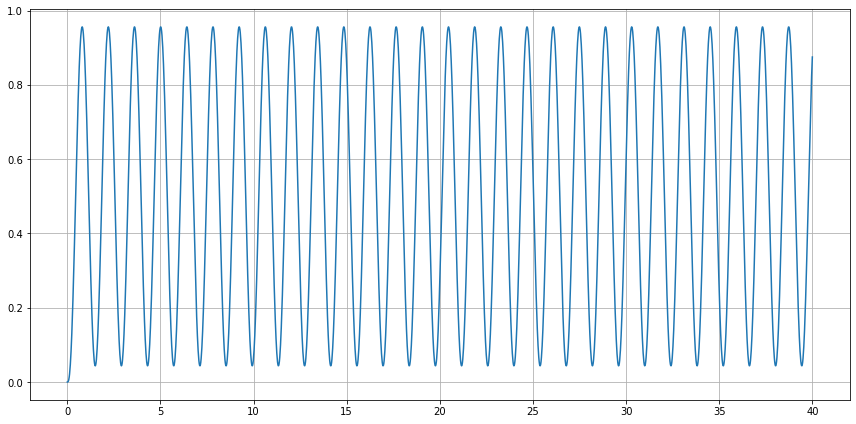

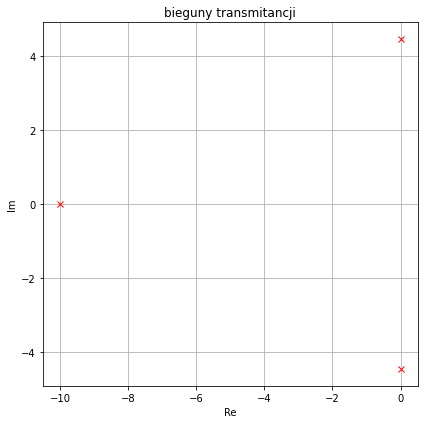

In [10]:
H2 = 1/(s**3 + 10*s**2 + 20*s + 100)
kp = 100
#determine Hr
Hr = kp
#determine H
H = ((Hr*H2) / ((Hr*H2)+1)).simplify()
#calculate and plot step response
fig, ax = plt.subplots(1, 1, figsize=default_figsize)
time = np.linspace(0,40,2000)
step = calculateStepResponseFromSympyH(H, time)
ax.plot(time, step)
ax.grid()
fig.tight_layout()
fig.show()

#calculate and plot poles
poles = calculatePolesFromSympyH(H)
fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
ax.plot(poles.real, poles.imag,'rx')
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im") 
ax.grid()
fig.tight_layout()
fig.show()